In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame as df
from datetime import datetime
import numpy as np
import covidutil as cu
import seaborn as sns

In [35]:
folder = "c:/PY-ML/data/covid1906/"
file = folder + "case_time_series.csv"

In [36]:
df = pd.read_csv(file)

In [37]:
df['Date'] = pd.to_datetime(df["Date"])

In [40]:
df['Day'] = df['Date'].dt.day_name()
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Active'] = df['Total Confirmed'] - df['Total Recovered'] - df['Total Deceased']


In [42]:
df.drop(columns = 'Date_YMD',inplace = True)

In [43]:
df.set_index('Date', inplace = True)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 507 entries, 2020-01-30 to 2021-06-19
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Daily Confirmed  507 non-null    int64 
 1   Total Confirmed  507 non-null    int64 
 2   Daily Recovered  507 non-null    int64 
 3   Total Recovered  507 non-null    int64 
 4   Daily Deceased   507 non-null    int64 
 5   Total Deceased   507 non-null    int64 
 6   Day              507 non-null    object
 7   Year             507 non-null    int64 
 8   Month            507 non-null    int64 
 9   Active           507 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 43.6+ KB


In [45]:
df.describe()

,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,Year,Month,Active
count,507.000000,5.070000e+02,507.000000,5.070000e+02,507.000000,507.000000,507.000000,507.000000,5.070000e+02
mean,58937.254438,7.569755e+06,56722.542406,6.858436e+06,761.637081,102210.234714,2020.335306,5.767258,6.091083e+05
std,87207.394754,7.946027e+06,85233.098169,7.290804e+06,1073.657311,94824.074370,0.472563,3.253620,8.355871e+05
min,0.000000,1.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,2020.000000,1.000000,0.000000e+00
25%,8800.500000,2.314590e+05,5049.500000,1.108390e+05,107.500000,6505.000000,2020.000000,3.000000,1.141150e+05
50%,26834.000000,6.977102e+06,23623.000000,5.985813e+06,390.000000,106864.000000,2020.000000,5.000000,3.018530e+05
75%,67539.000000,1.089860e+07,64293.000000,1.060412e+07,903.500000,155042.500000,2021.000000,8.000000,7.502565e+05
max,414280.000000,2.988119e+07,422391.000000,2.875833e+07,6139.000000,386150.000000,2021.000000,12.000000,3.751539e+06


# subplots

Text(0.5, 0, 'days')

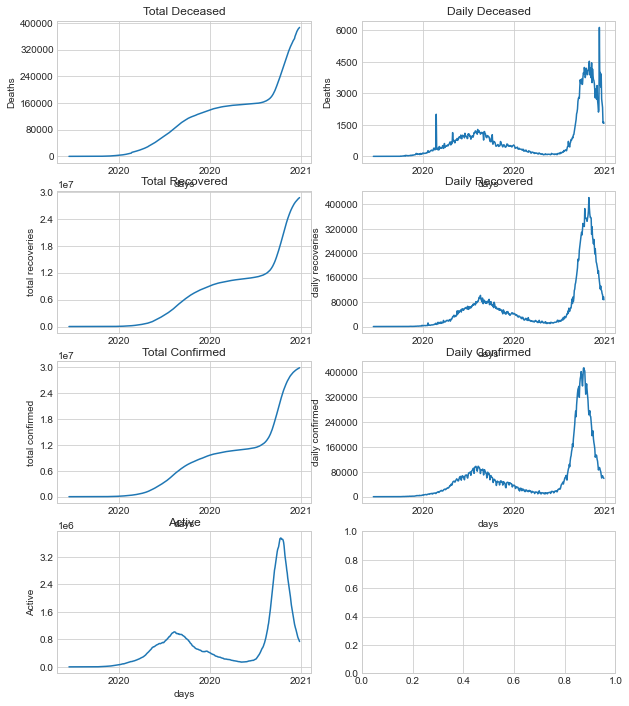

In [66]:
#subplot of the data 

plt.style.use('seaborn-whitegrid')
fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8)) = plt.subplots(4,2,figsize = (10,12),sharex = False)

ax1.xaxis.set_major_locator(plt.MaxNLocator(3))
ax1.yaxis.set_major_locator(plt.MaxNLocator(6))
ax1.plot(df['Total Deceased'])
ax1.set_title('Total Deceased')
ax1.set_xlabel('days')
ax1.set_ylabel('Deaths')

ax2.xaxis.set_major_locator(plt.MaxNLocator(3))
ax2.yaxis.set_major_locator(plt.MaxNLocator(6))
ax2.plot(df['Daily Deceased'])
ax2.set_title('Daily Deceased')
ax2.set_xlabel('days')
ax2.set_ylabel('Deaths')

ax3.xaxis.set_major_locator(plt.MaxNLocator(3))
ax3.yaxis.set_major_locator(plt.MaxNLocator(6))
ax3.plot(df['Total Recovered'])
ax3.set_title('Total Recovered')
ax3.set_ylabel('total recoveries')

ax4.xaxis.set_major_locator(plt.MaxNLocator(3))
ax4.yaxis.set_major_locator(plt.MaxNLocator(6))
ax4.plot(df['Daily Recovered'])
ax4.set_title('Daily Recovered')
ax4.set_ylabel('daily recoveries')
ax4.set_xlabel('days')

ax5.xaxis.set_major_locator(plt.MaxNLocator(3))
ax5.yaxis.set_major_locator(plt.MaxNLocator(6))
ax5.plot(df['Total Confirmed'])
ax5.set_title('Total Confirmed')
ax5.set_ylabel('total confirmed')
ax5.set_xlabel('days')

ax6.xaxis.set_major_locator(plt.MaxNLocator(3))
ax6.yaxis.set_major_locator(plt.MaxNLocator(6))
ax6.plot(df['Daily Confirmed'])
ax6.set_title('Daily Confirmed')
ax6.set_ylabel('daily confirmed')
ax6.set_xlabel('days')

ax7.xaxis.set_major_locator(plt.MaxNLocator(3))
ax7.yaxis.set_major_locator(plt.MaxNLocator(6))
ax7.plot(df["Active"])
ax7.set_title("Active")
ax7.set_ylabel("Active")
ax7.set_xlabel('days')

### 1

In [49]:
df2 = df[['Daily Confirmed','Daily Recovered','Daily Deceased']]

In [63]:
#top 5 days of maximum recoveries

df2.nlargest(5,'Daily Confirmed')

,Daily Confirmed,Daily Recovered,Daily Deceased
Date,,,
2021-05-06,414280,328349,3923
2021-05-05,412624,330718,3979
2021-05-07,406901,327675,4233
2021-05-08,403808,386395,4092
2021-04-30,402014,299198,3525


In [64]:
#top 5 days of maximum deaths

df2.nlargest(5,'Daily Deceased')

,Daily Confirmed,Daily Recovered,Daily Deceased
Date,,,
2021-06-09,93883,149022,6139
2021-05-18,267246,389758,4529
2021-05-23,222834,302253,4454
2021-05-17,263021,422391,4334
2021-05-07,406901,327675,4233


In [65]:
#to 5 days of maximum recoveries

df2.nlargest(5,'Daily Recovered')

,Daily Confirmed,Daily Recovered,Daily Deceased
Date,,,
2021-05-17,263021,422391,4334
2021-05-18,267246,389758,4529
2021-05-08,403808,386395,4092
2021-05-16,281837,378526,4098
2021-05-19,276187,369005,3877


In [59]:
#day when active cases where maximum

df[df['Active'] == df['Active'].max()]

,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,Day,Year,Month,Active
Date,,,,,,,,,,
2021-05-09,366455,22662329,353777,18665233,3749,245557,Sunday,2021,5,3751539


In [58]:
#day when confirmed cases were maximum

df[df['Daily Confirmed'] == df['Daily Confirmed'].max() ]

,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,Day,Year,Month,Active
Date,,,,,,,,,,
2021-05-06,414280,21485165,328349,17597386,3923,233483,Thursday,2021,5,3654296


In [57]:
#day when there were maximum recoveries

df[df['Daily Recovered'] == df['Daily Recovered'].max() ]

,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,Day,Year,Month,Active
Date,,,,,,,,,,
2021-05-17,263021,25227883,422391,21589906,4334,278160,Monday,2021,5,3359817


In [60]:
#day when there were maximum deaths

df[df['Daily Deceased'] == df['Daily Deceased'].max() ]

,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,Day,Year,Month,Active
Date,,,,,,,,,,
2021-06-09,93883,29181911,149022,27645065,6139,359106,Wednesday,2021,6,1177740
